In [56]:
# 🩺 Heart Disease Prediction Project - Step 1

## Problem Statement
# Goal: Predict whether a person is likely to have heart disease based on medical attributes.
# Type: Supervised Learning (Binary Classification)
# Target: 'target' column (1 = disease, 0 = no disease)
# Importance: Early prediction helps doctors take preventive steps.

## Overview of Dataset
# Dataset: Heart Disease UCI Dataset (Cleveland Clinic)
# Total Rows: 303
# Total Columns: 14 (13 features + 1 target)

# Column Descriptions
# age      : Age of the patient
# sex      : Gender (1 = male, 0 = female)
# cp       : Chest Pain Type (0–3)
# trestbps : Resting Blood Pressure (in mm Hg)
# chol     : Serum Cholesterol (in mg/dl)
# fbs      : Fasting Blood Sugar > 120 mg/dl (1 = true, 0 = false)
# restecg  : Resting ECG Results (0–2)
# thalach  : Maximum Heart Rate Achieved
# exang    : Exercise Induced Angina (1 = yes, 0 = no)
# oldpeak  : ST Depression Induced by Exercise
# slope    : Slope of Peak Exercise ST Segment (0–2)
# ca       : Number of Major Vessels (0–4)
# thal     : Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
# target   : 1 = heart disease present, 0 = no disease

## Load the Dataset

import pandas as pd
import numpy as np

# Load dataset (ensure 'heart.csv' is in the same directory)
data = pd.read_csv('heart.csv')

In [57]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:

print('Original Column Names:')
data.columns

Original Column Names:


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [59]:
# Rename Columns for Clarity
data.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slope': 'ST_Slope',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)
print('Updated Column Names:')
print(list(data.columns))


Updated Column Names:
['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Depression', 'ST_Slope', 'MajorVessels', 'Thalassemia', 'HeartDisease']


In [60]:

data

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
# Step 2: Data Cleaning & Preprocessing
#In this step, we will clean the dataset and make it ready for modeling. 
# We'll check for missing values, duplicates, incorrect data types, and outliers. 
# Proper cleaning ensures our machine learning model is trained on reliable data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Display basic info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Gender          303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   ST_Depression   303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  MajorVessels    303 non-null    int64  
 12  Thalassemia     303 non-null    int64  
 13  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
# 1️⃣ Check for Missing Values

In [63]:
data.isnull()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
# Count missing values in each column
data.isnull().sum()


Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Depression     0
ST_Slope          0
MajorVessels      0
Thalassemia       0
HeartDisease      0
dtype: int64

In [65]:
# ✅ Explanation:
# isnull() returns True for null values.
# sum() counts how many null values exist per column.
# If the output shows all zeros, we have no missing data.


In [66]:
# 2️⃣ Check for Duplicate Records
# ----------------------------------------------
duplicates = data.duplicated().sum()
print("Total Duplicate Rows:", duplicates)


Total Duplicate Rows: 1


In [67]:
# Display duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows


,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [68]:
#If you want to see both copies of the duplicate rows (not just one of each duplicate): 
duplicate_all = data[data.duplicated(keep=False)]
duplicate_all


,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [69]:
#Show the index of duplicate row(s)
data[data.duplicated()].index


Index([164], dtype='int64')

In [70]:
# Remove Duplicates
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)
print("Total duplicates after cleaning:", data.duplicated().sum())



Shape after removing duplicates: (302, 14)
Total duplicates after cleaning: 0


In [71]:
#If you want to show before vs after, use:
print("Before:", len(data) + 1)  # add 1 since one duplicate was found
data = data.drop_duplicates()
print("After:", len(data))

Before: 303
After: 302


In [72]:
# 3️⃣ Verify Data Types
data.dtypes

Age                 int64
Gender              int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
ST_Depression     float64
ST_Slope            int64
MajorVessels        int64
Thalassemia         int64
HeartDisease        int64
dtype: object

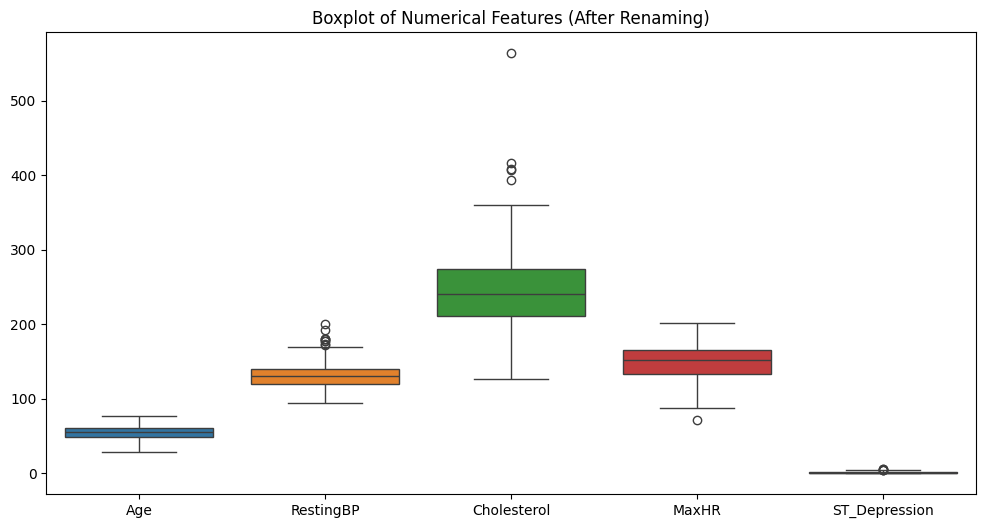

In [73]:
# 4️⃣ Detect Outliers (Optional Visualization)
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'ST_Depression']])
plt.title('Boxplot of Numerical Features (After Renaming)')
plt.show()




Middle 50% of the data (called the Interquartile Range or IQR).

For “Cholesterol,” most values are between ~200 and ~275.

The median (50th percentile) — the center of the data. For “Age,” the median is around 55 years.

For “MaxHR,” whiskers go from around 80 to 200 bpm.

For “Cholesterol,” dots above 400 are possible outliers (very high cholesterol).

Feature-by-Feature Explanation (specific to your plot)

Age — no major outliers, spread looks normal (patients aged mostly 40–70).

RestingBP (Resting Blood Pressure) — a few outliers (patients with unusually high blood pressure, possibly hypertensive).

Cholesterol — several outliers (patients with extremely high cholesterol > 400–500).

MaxHR (Maximum Heart Rate Achieved) — a few lower outliers (possibly elderly patients or those with low exercise tolerance).

ST_Depression — small range, a few minor outliers (likely variations due to exercise ECG response).


In [74]:
# Function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap values
    data[column] = np.where(data[column] > upper, upper,
                 np.where(data[column] < lower, lower, data[column]))
    # Apply to selected columns
cap_outliers(data, 'RestingBP')
cap_outliers(data, 'Cholesterol')
cap_outliers(data, 'MaxHR')
cap_outliers(data, 'ST_Depression')



Step 1: Q1 and Q3

Q1 = 25th percentile (the value below which 25% of data lies)

Q3 = 75th percentile (value below which 75% of data lies)

👉 Together, they define the Interquartile Range (IQR) — the middle 50% of the data.

IQR = Q3 - Q1
✅ Example (Cholesterol):

Q1 = 200

Q3 = 270

IQR = 70

That means most people's cholesterol lies within a 70-point range.

🔹 Step 3: Calculate the Lower and Upper Boundaries
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

This formula defines the normal acceptable range of data:

Anything below lower or above upper is considered an outlier.

✅ Example (continued):

Lower = 200 - 1.5(70) = 95

Upper = 270 + 1.5(70) = 375

So any cholesterol value below 95 or above 375 is an outlier.

Step 4: Cap Outliers Using np.where()
data[column] = np.where(data[column] > upper, upper,
                 np.where(data[column] < lower, lower, data[column]))


Let’s break this line:

np.where(condition, value_if_true, value_if_false)

The inner np.where() checks if a value is below lower limit.

The outer one checks if it’s above upper limit.

So:

If a value > upper → replace with upper

If a value < lower → replace with lower

Otherwise → keep the original value

✅ Example:
If someone has Cholesterol = 520, it becomes 375 (the upper limit).
If someone has Cholesterol = 80, it becomes 95 (the lower limit).


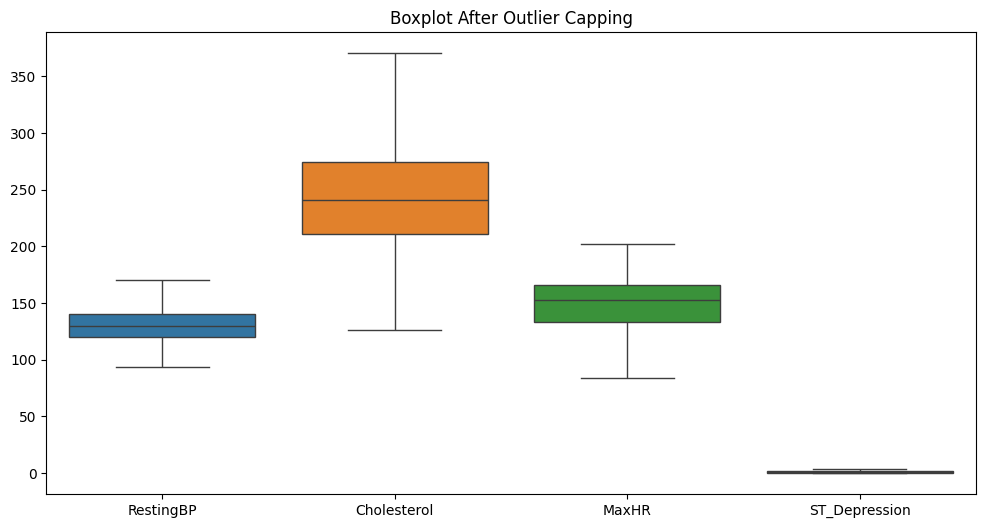

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['RestingBP', 'Cholesterol', 'MaxHR', 'ST_Depression']])
plt.title("Boxplot After Outlier Capping")
plt.show()


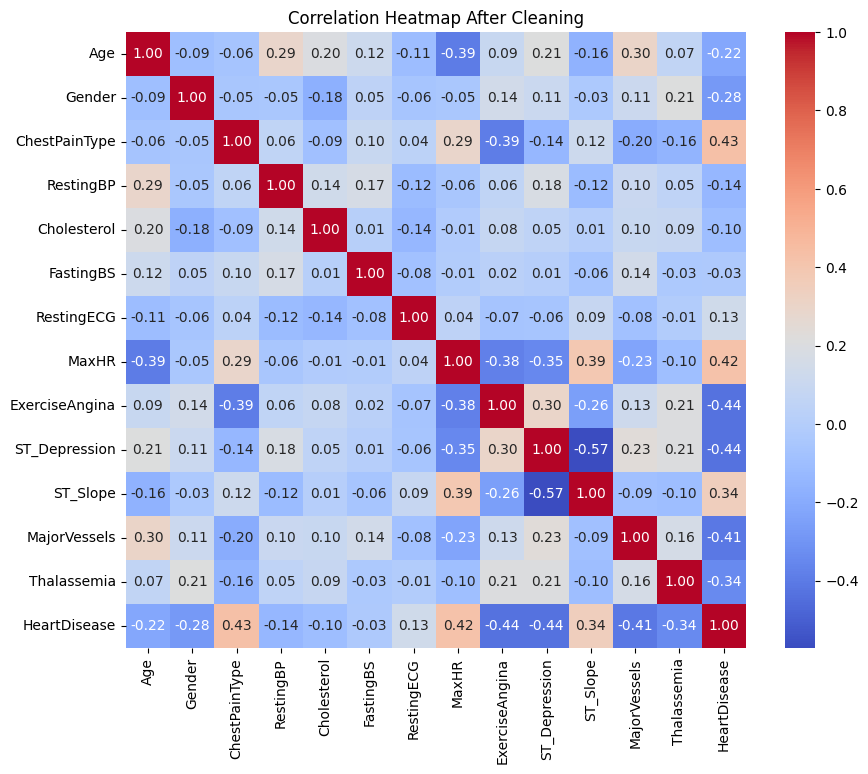

In [76]:
# 5️⃣ Correlation Check

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Cleaning')
plt.show()


Step 4: Interpreting the Relationships You Mentioned

Let’s decode each one from your heatmap 👇

1️⃣ Age vs MaxHR → -0.39 (Blue)

As Age increases, MaxHR (maximum heart rate) decreases.
🧠 Older patients typically can’t reach as high a heart rate during exercise.

2️⃣ Cholesterol vs HeartDisease → -0.10 (Light Blue)

Very weak correlation.
🧠 Cholesterol doesn’t directly determine heart disease in this dataset — maybe because patients have different lifestyles or treatments.

In [77]:
#Final Check
print("Final Dataset Shape:", data.shape)
print("Any Missing Values:")
print(data.isnull().sum())


Final Dataset Shape: (302, 14)
Any Missing Values:
Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Depression     0
ST_Slope          0
MajorVessels      0
Thalassemia       0
HeartDisease      0
dtype: int64


Now that we have cleaned and renamed our dataset columns, the next step is preprocessing.
# Step 3: Data Preprocessing & Feature 

# This includes:
# 1. Separating features and target variable
# 2. Encoding categorical variables
# 3. Scaling numerical features
# 4. Splitting data into training and testing sets


In [96]:
x =data.drop('HeartDisease', axis=1)  # Features (input variables)
y = data['HeartDisease']               # Target (output variable)
print('Feature Matrix Shape:', x.shape)


Feature Matrix Shape: (302, 13)


In [98]:
# define categorical and numerical columns
categorical_cols = ['Gender', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'MajorVessels', 'Thalassemia']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'ST_Depression']
print('Categorical Columns:', categorical_cols)
print('Numerical Columns:', numerical_cols)

Categorical Columns: ['Gender', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'MajorVessels', 'Thalassemia']
Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'ST_Depression']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# 3️⃣ Encode Categorical Variables
X_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Show results
print("Shape after Encoding:", X_encoded.shape)
X_encoded.head()




Shape after Encoding: (302, 23)


,Age,RestingBP,Cholesterol,MaxHR,ST_Depression,HeartDisease,Gender_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,...,ExerciseAngina_1,ST_Slope_1,ST_Slope_2,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,63,145.0,233.0,150.0,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130.0,250.0,187.0,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130.0,204.0,172.0,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120.0,236.0,178.0,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120.0,354.0,163.0,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [106]:
# 4️⃣ Feature Scaling (Standardization)
scaler = StandardScaler()
# Select only numerical columns for scaling
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
print('Scaled Numerical Features Example:')
print(X_encoded[numerical_cols].head())

Scaled Numerical Features Example:
        Age  RestingBP  Cholesterol     MaxHR  ST_Depression
0  0.949794   0.828927    -0.261076  0.017027       1.147606
1 -1.928548  -0.075902     0.097514  1.644957       2.230096
2 -1.485726  -0.075902    -0.872787  0.984985       0.335739
3  0.174856  -0.679121    -0.197795  1.248974      -0.205506
4  0.285561  -0.679121     2.291236  0.589003      -0.385921


In [107]:
# # 5️⃣ Split Dataset into Training and Testing Set

In [108]:
# 5️⃣ Split Dataset into Training and Testing Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_test.shape)


Training Data Shape: (241, 23)
Testing Data Shape: (61, 23)


In [110]:
# 6️⃣ Model Training and Evaluation (Logistic Regression + Random Forest)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# ------------------------------
# Logistic Regression
# ------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("🔹 Logistic Regression Accuracy:", round(accuracy_lr * 100, 2), "%")
print("🔹 Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Accuracy: 100.0 %
🔹 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



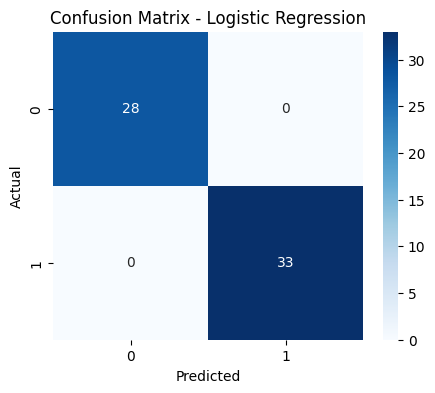

In [116]:
# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [112]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n🔹 Random Forest Accuracy:", round(accuracy_rf * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



🔹 Random Forest Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



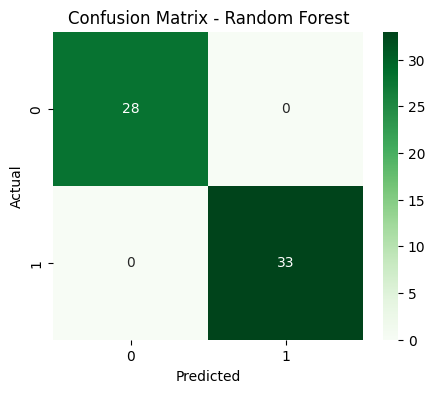

In [113]:
# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [114]:
# ------------------------------
# Compare Both Models
# ------------------------------
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_rf]
})

print("\n📊 Model Comparison:\n")
print(results)



📊 Model Comparison:

                 Model  Accuracy
0  Logistic Regression       1.0
1        Random Forest       1.0


C:\Users\VIKAS\AppData\Local\Temp\ipykernel_26084\2976964767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='coolwarm')


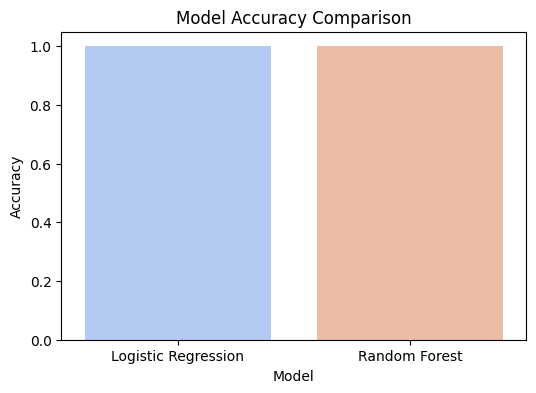

In [115]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=results, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.show()

In [117]:
import pickle

# Save the trained Random Forest model and scaler together
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump((rf_model, scaler), file)

print("✅ Model and Scaler saved successfully as 'heart_disease_model.pkl'")


✅ Model and Scaler saved successfully as 'heart_disease_model.pkl'
